<a href="https://colab.research.google.com/github/Factorito/AIportplio/blob/main/I_wanna_fuckwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

f = open('insult_dataset_augmented.txt','r')
line = f.readline()

print(line)
for i in range(10):
    line = f.readline()
    print(line)


1	ass moron

0	병신 같은새끼

0	개새버러지

0	좆 년

2	pratnumpty

1	fuckpiece of shit

0	지랄 등신

0	개새같은새끼

0	ㅅㅂ 짓거리

0	좆 버러지

2	wanker cow



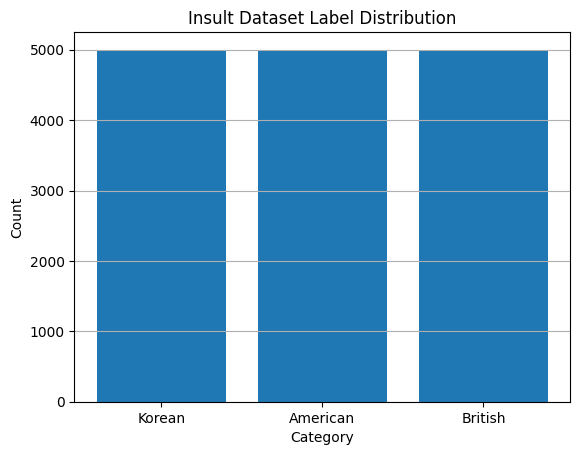

In [3]:
import matplotlib.pyplot as plt


labels = []
texts = []
# 파일 읽기
with open("insult_dataset_augmented.txt", "r", encoding="utf-8") as f:
    for line in f:
        label ,text = line.strip().split("\t")
        labels.append(int(label))
        texts.append(text)


plt.hist(labels, bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
plt.xticks([0, 1, 2], ['Korean', 'American', 'British'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Insult Dataset Label Distribution')
plt.grid(axis='y')
plt.show()


In [4]:
!pip install tensorflow

In [30]:
import numpy as np
import tensorflow as tf

train_x = np.array(texts)
train_y = np.array(labels)

train_y_one_hot = tf.keras.utils.to_categorical(train_y, num_classes=3)

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense
import numpy as np

# Determine the maximum sequence length (as in your code)
max_sequence_length = max([len(text.split()) for text in texts])

# Create a TextVectorization layer
vectorize_layer = TextVectorization(
    max_tokens=10000,
    output_sequence_length=max_sequence_length)

# Adapt the layer to your training data
vectorize_layer.adapt(train_x)

model = tf.keras.Sequential([
    # TextVectorization 레이어를 모델에 직접 포함
    vectorize_layer,
    # 단어 인덱스를 Dense Vector로 변환
    Embedding(input_dim=10000, output_dim=64),
    # 시퀀스 데이터를 하나의 벡터로 요약
    GlobalAveragePooling1D(),

    # 이제 Dense 레이어를 연결
    tf.keras.layers.Dense(96, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
import keras.backend as K

K.clear_session()


In [34]:
# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y_one_hot))

# Determine the size of the dataset
dataset_size = len(list(train_dataset))

# Define the split size
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

# Shuffle the dataset
train_dataset = train_dataset.shuffle(buffer_size=dataset_size)

# Split the dataset
val_dataset = train_dataset.skip(train_size)
train_dataset = train_dataset.take(train_size)


# Batch the datasets
train_dataset = train_dataset.batch(20)
val_dataset = val_dataset.batch(20)


# Train the model using the dataset
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8599 - loss: 0.3496 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 1.0000 - loss: 5.7743e-04 - val_accuracy: 1.0000 - val_loss: 3.7306e-05
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 1.4871e-04 - val_accuracy: 1.0000 - val_loss: 4.3994e-04
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9983 - val_loss: 0.0061
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9982 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 4.7511e-05


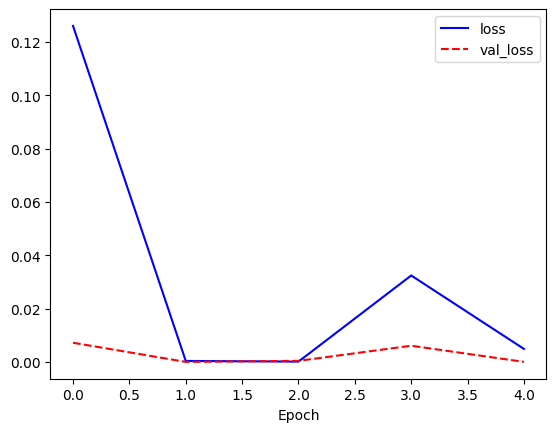

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [40]:
# 수정된 코드 예시
import tensorflow as tf
import numpy as np

s = input("문장을 입력하세요: ")

# 1. 사용자의 입력 문자열을 리스트에 담는다.
input_string_list = [s]

# 2. 이 리스트를 tf.Tensor로 명시적으로 변환한다.
input_tensor = tf.constant(input_string_list, dtype=tf.string)

# 3. 변환된 텐서를 모델에 전달하여 예측한다.
i = model.predict(input_tensor)
predicted_class_index = np.argmax(i, axis=1)[0]


# 인덱스에 따라 클래스 분류
if predicted_class_index == 0:
    print("Korean Abuse")
elif predicted_class_index == 1:
    print("American Abuse")
elif predicted_class_index == 2:
    print("British Abuse")
else:
    print("알 수 없는 욕이다")

KeyboardInterrupt: Interrupted by user

In [45]:
model.save('Abuse_Classification model.keras')